In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio
import time
from IPython.display import HTML

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [20]:
class FFSN_MultiClass: #Class for Feed-Forward Noural Network 
  
  def __init__(self, n_inputs, n_outputs, hidden_sizes=[3]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny] 

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.random.randn(1, self.sizes[i+1])
      
  def sigmoid(self, x): # Sigmoid Function
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x): # Softmax Function for O/P
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x): # Forward Pass 
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def predict(self, X): # Predict Function (Forward Pass)
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, x): #Gradient of Sigmoid Function
    return x*(1-x) 
  
  def cross_entropy(self,label,pred): # Entropy Loss Calculations
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, x, y): # Gradient Calculation
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False): # Fit Function (For Training)
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
                  
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()

In [21]:
data = pd.read_csv('Final_Refined_Encoded.csv')

In [22]:
data.head(20)

,Google,HP,Amazon,Huawei,Toshiba,T-Mobile,vivo,Prestigio,VK Mobile,Wiko,...,RAM,primary_camera,secondary_camera,weight_g,internal_memory,battery,Thickness,display_size,screen_to_body_ratio,Price
0,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.300,0.052632,0.128524,0.062498,0.004180,0.002765,0.344828,0.726636,2
1,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.300,0.210526,0.083077,0.062498,0.005018,0.002150,0.258621,0.748832,3
2,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.175,0.052632,0.076150,0.015623,0.002454,0.005962,0.229885,0.507216,2
3,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.100,0.052632,0.076150,0.124998,0.002706,0.002457,0.522989,0.710280,3
4,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.300,0.631579,0.081579,0.062498,0.004944,0.002150,0.258621,0.717290,3
5,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.300,0.210526,0.076150,0.031248,0.006152,0.003072,0.258621,0.732477,3
6,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.175,0.210526,0.061103,0.015623,0.002454,0.002150,0.229885,0.686916,2
7,0,0,0,0,0,0,0,0,0,0,...,0.031235,0.100,0.052632,0.175369,0.124998,0.005437,0.002304,0.402299,0.695093,4
8,0,0,0,0,0,0,0,0,0,0,...,0.046860,0.500,0.368421,0.073589,0.062498,0.003526,0.002150,0.258621,0.731308,3
9,0,0,0,0,0,0,0,0,0,0,...,0.015610,0.100,0.210526,0.069593,0.015623,0.002454,0.002918,0.201149,0.632009,2


In [23]:
bins = [1, 2, 3, 4]
#bins = [0, 50, 150, 250, 500, 1000]
names = [0, 1, 2, 3]

label_dict = dict(enumerate(names, 1))
price = pd.Series(np.vectorize(label_dict.get)(np.digitize(data['Price'], bins)))
price

0       1
1       2
2       1
3       2
4       2
5       2
6       1
7       3
8       2
9       1
10      0
11      2
12      1
13      2
14      1
15      2
16      2
17      2
18      1
19      0
20      0
21      1
22      2
23      1
24      2
25      1
26      2
27      2
28      0
29      2
       ..
4973    3
4974    1
4975    1
4976    1
4977    1
4978    3
4979    3
4980    3
4981    2
4982    3
4983    3
4984    2
4985    2
4986    1
4987    1
4988    2
4989    2
4990    2
4991    0
4992    2
4993    0
4994    3
4995    1
4996    2
4997    2
4998    2
4999    2
5000    1
5001    0
5002    1
Length: 5003, dtype: int32

In [24]:
data['Price'] = price

In [28]:
# Saperating the Target Column
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [35]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

In [36]:
# Scalar-Transform 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [48]:
# Make an instance of the Model
pca = PCA(.95)

In [49]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
X_train_img = pca.transform(X_train)
X_test_img = pca.transform(X_test)

In [51]:
# OneHotEncoding
enc = OneHotEncoder()
# 1 -> (1, 0, 0, 0, 0, 0), 2 -> (0, 1, 0, 0, 0, 0), 3 -> (0, 0, 1, 0, 0, 0), 4 -> (0, 0, 0, 1, 0, 0), 5 -> (0, 0, 0, 0, 1, 0), 6-> (0, 0, 0, 0, 1, 0) 
y_OH_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(y_test,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(3502, 4) (1501, 4)


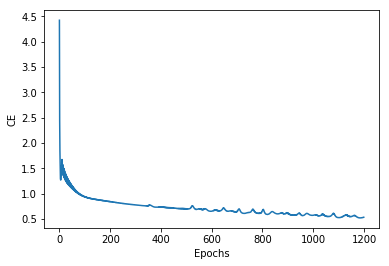

In [61]:
# FFN-Training
ffsn_multi = FFSN_MultiClass(84,4,[50,10])
ffsn_multi.fit(X_train_img,y_OH_train,epochs=1200,learning_rate=.05,display_loss=True)

In [60]:
# Accuracy Calculation
Y_pred_train = ffsn_multi.predict(X_train_img)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi.predict(X_test_img)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, y_train)
accuracy_val = accuracy_score(Y_pred_val, y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.77
Validation accuracy 0.62
